In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

# data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [5]:
df

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [6]:
df.rename(columns={'v1': 'target', 'v2': 'texts'}, inplace=True)
df

target                                              texts
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ì_ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [8]:
df

target                                              texts
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5572 rows x 2 columns]

 1 means spam
 0 means ham

In [9]:
df.isnull().sum()

target    0
texts     0
dtype: int64

In [10]:
# checking for duplicate values
df.duplicated().sum()

403

In [11]:
# removing duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

# EDA

In [12]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

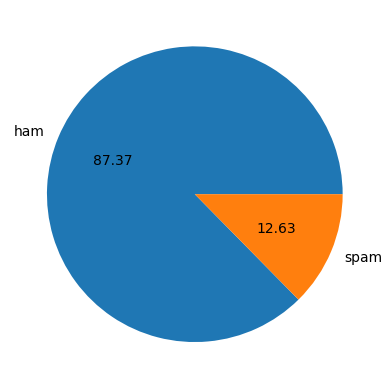

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [21]:
!pip install nltk

DEPRECATION: Loading egg at c:\users\hindol\appdata\local\programs\python\python311\lib\site-packages\einops-0.6.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\hindol\appdata\local\programs\python\python311\lib\site-packages\inflect-6.0.4-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\hindol\appdata\local\programs\python\python311\lib\site-packages\progressbar-2.5-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\hindol\appdata\local\programs\python\python311\lib\site-packages\rotary_embedding_torch-0.2.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for pac

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HINDOL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

checking length of sms

In [14]:
df['num_characters']=df['texts'].apply(len)

In [15]:
df

target                                              texts  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  
0                111  
1                 29  
2                155  
3                 49  
4                 61  
...              ...  
5567             161  
5568              37  
5569              57  
5570             125  
5571              26  

[5169 rows x 3 columns]

checking number of words in each sms

In [19]:
df['texts'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: texts, Length: 5169, dtype: int64

In [20]:
df['num_words'] = df['texts'].apply(lambda x: len(nltk.word_tokenize(x)))
df

target                                              texts  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  
0                111         24  
1                 29          8  
2                155         37  
3                 49         13  
4                 61         15  
...              ...        ...  
5567             161         35  
5568              37          9  
5569              57         15  
5570             125         27  
5571              26          7  

[5169 rows x 4 columns]

checking number of sentences in sms

In [21]:
df['texts'].apply(lambda x: len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: texts, Length: 5169, dtype: int64

In [22]:
df['num_sentences'] = df['texts'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

target                                              texts  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  num_sentences  
0                111         24              2  
1                 29          8              2  
2                155         37              2  
3                 49         13              1  
4                 61         15              1  
...              ...        ...            ...  
5567             161         35              4  
5568              37          9              1  
5569              57         15              2  
5570             125         27              1  
5571              26          7              2  

[5169 rows x 5 columns]

In [23]:
df.describe()

target  num_characters    num_words  num_sentences
count  5169.000000     5169.000000  5169.000000    5169.000000
mean      0.126330       78.977945    18.455407       1.961308
std       0.332253       58.236293    13.322448       1.432583
min       0.000000        2.000000     1.000000       1.000000
25%       0.000000       36.000000     9.000000       1.000000
50%       0.000000       60.000000    15.000000       1.000000
75%       0.000000      117.000000    26.000000       2.000000
max       1.000000      910.000000   220.000000      38.000000

In [24]:
#ham
df[df.target==0][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123339       1.815545
std         56.358207    13.491315       1.364098
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

In [25]:
#spam
df[df.target==1][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.969372
std         30.137753    7.008418       1.488910
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000

In [26]:
import plotly.express as px
#histogram for HAM sms
px.histogram(df[df.target==0]['num_characters'])

In [27]:
# histogram for SPAM sms
px.histogram(df[df.target==1]['num_characters'])

In [28]:
px.histogram(df[df.target==0]['num_words'])

In [29]:
px.histogram(df[df.target==1]['num_words'])

In [30]:
px.histogram(df[df.target==0]['num_sentences'])

In [31]:
px.histogram(df[df.target==1]['num_sentences'])

In [32]:
import scipy.stats as stat
stat, pval = stat.ttest_ind(a=df['num_characters'], b=df['num_words'])
if pval < 0.05:
    print('there is a statistically significant relation between characters and words, hence reject null hypothesis')
else:
    print('accept null hypothesis')

there is a statistically significant relation between characters and words, hence reject null hypothesis


In [33]:
import scipy
stat, pval = scipy.stats.ttest_ind(a=df['num_words'], b=df['num_sentences'])
if pval < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

reject null hypothesis


In [34]:
import scipy 
stat, pval = scipy.stats.ttest_ind(a=df['num_characters'], b=df['num_sentences'])
if pval < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

reject null hypothesis


They all have statistically significant correlations with each other

In [35]:
#pearson correlation
print(df['num_characters'].corr(df['num_words']))

0.9657843779682432


In [36]:
print(df['num_words'].corr(df['num_sentences']))

0.6808819800988072


In [37]:
print(df['num_characters'].corr(df['num_sentences']))

0.6261179874375582


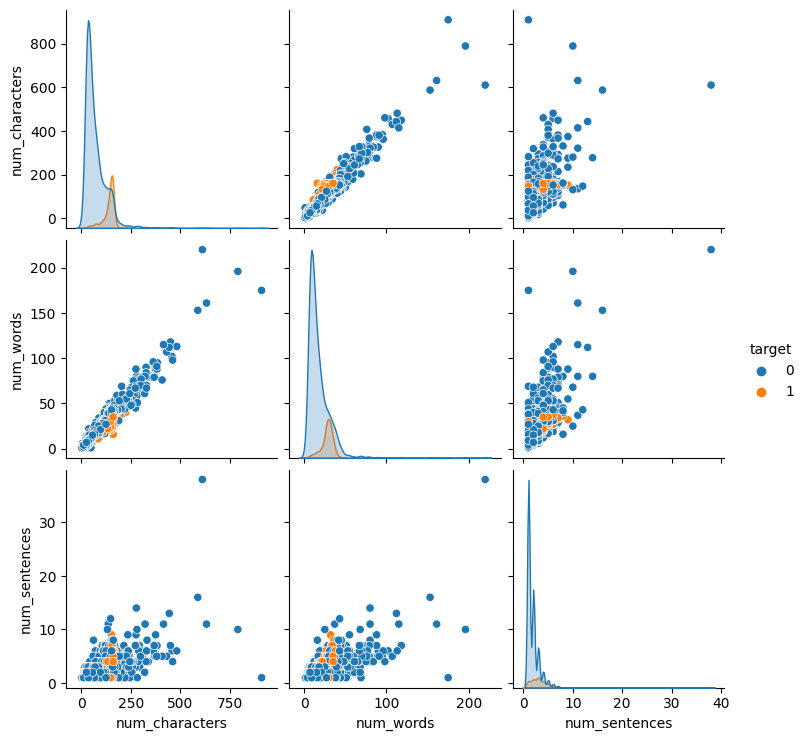

In [38]:
import seaborn as sns
sns.pairplot(df, hue='target')

<Axes: >

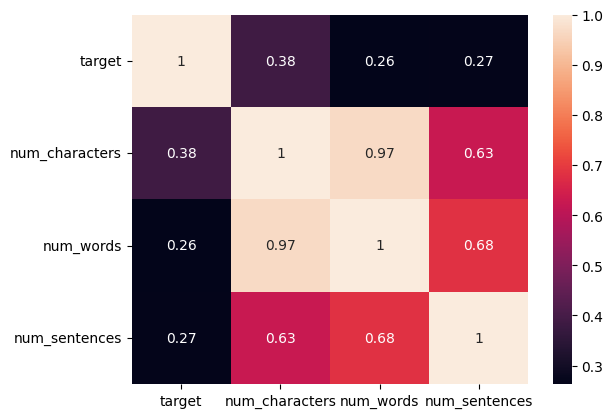

In [39]:
sns.heatmap(df[['target','num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

In [76]:
# better opt num_characters as the variation of this with target is 0.38 and greater than others

# data preprocessing

. lower case
. tokenization
. removing special characters
. removing stop words and punctuations
. stemming

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    x = []
    for i in text:
        if i.isalnum():  
            x.append(i)
    text = x[:] # we cloned the list
    x.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
    text = x[:]
    x.clear()
    for i in text:
        x.append(ps.stem(i))
        
    return " ".join(x) # returning as string

In [52]:
print(transform_text('are you a football player?'))
print(transform_text('I loved the movie, The Imitation Game. What about you?'))

footbal player
love movi imit game


In [89]:
# for this instance the (*, !) is a special character hence its removed cause we used the alpha numeric function
# and in this function it returns True if all the characters are alphanumeric, [has characters between these(A-Z)(0-9)]

In [91]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HINDOL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [42]:
# now wth is stopwords, lets check it with nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

these words dont contribute to the actual meaning of the sentence, their job is to construct the sentence

In [43]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
from nltk.stem.porter import PorterStemmer

In [46]:
ps = PorterStemmer()
ps.stem('eating')

'eat'

In [47]:
ps.stem('played')

'play'

In [48]:
ps.stem('dancing')

'danc'

In [49]:
ps.stem('wrote')

'wrote'

In [50]:
# now lets apply the function on our text data
df['transformed_text']=df['texts'].apply(transform_text)

In [51]:
df

target                                              texts  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  num_sentences  \
0                111         24              2   
1                 29          8              2   
2                155         37              2   
3                 49         13              1   
4                 61         15              1   
...              ...        ...            ...   
5567             161         35              4   
5568              37          9              1   
5569              57         15              2   
5570             125         27              1   
5571              26          7              2   

                                       transformed_text  
0     go jurong point crazi avail bugi n great world...  
1                                 ok lar joke wif u oni  
2     free entri 2 wkli comp win fa cup final tkt 21...  
3                   u dun say earli hor u c alreadi say  
4                  nah think goe usf live around though  
...                                                 ...  
5567  2nd time tri 2 contact u pound prize 2 claim e...  
5568                              b go esplanad fr home  
5569                                  piti mood suggest  
5570  guy bitch act like interest buy someth els nex...  
5571                                     rofl true name  

[5169 rows x 6 columns]

# time to make a wordcloud to see the imp words for HAM and SPAM

In [53]:
from wordcloud import WordCloud

In [54]:
wc = WordCloud(width=500, height=600, min_font_size=10, background_color='lightgreen')

In [55]:
spam_wc = wc.generate(df[df.target==1]['transformed_text'].str.cat(sep=" "))

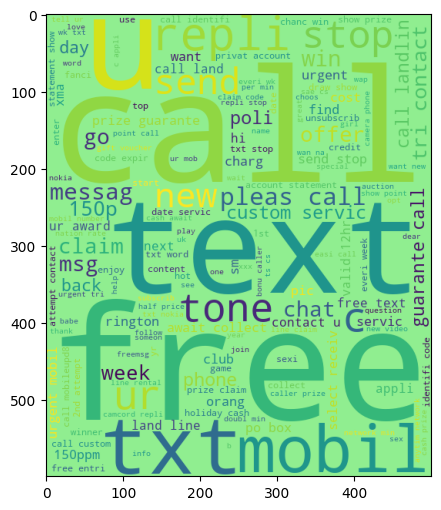

In [56]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

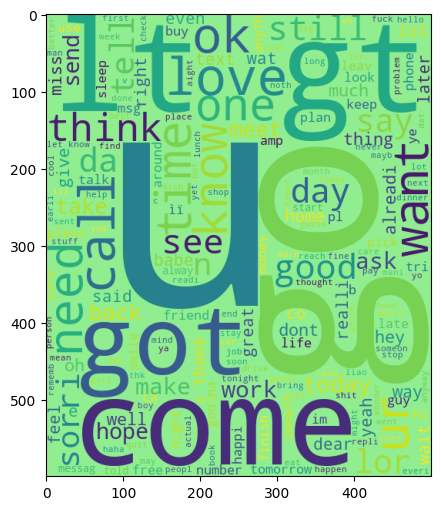

In [57]:
ham_wc = wc.generate(df[df.target==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

# lets check the top 30 words for HAM sms

In [58]:
ham_words = []
for i in df[df.target==0]['transformed_text'].tolist():
    for word in i.split():
        ham_words.append(word)
ham_words

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [59]:
len(ham_words)

35402

In [60]:
from collections import Counter
Counter(ham_words).most_common(30) # the top 30 words used in HAM sms

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('love', 216),
 ('ok', 215),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [61]:
pd.DataFrame(Counter(ham_words).most_common(30))

0    1
0       u  883
1      go  404
2     get  349
3      gt  288
4      lt  287
5       2  284
6    come  275
7     got  236
8    know  236
9    like  234
10   call  233
11   time  219
12   love  216
13     ok  215
14   good  213
15   want  208
16     ur  197
17    day  190
18   need  170
19    one  165
20    lor  159
21      4  156
22   home  152
23  think  149
24    see  147
25   take  143
26  still  143
27     da  142
28   tell  133
29   make  129

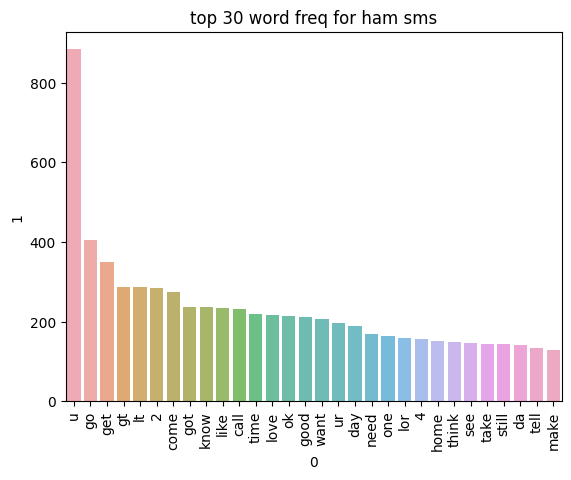

In [62]:
sns.barplot(x=pd.DataFrame(Counter(ham_words).most_common(30))[0],y=pd.DataFrame(Counter(ham_words).most_common(30))[1], alpha=0.8)
plt.title('top 30 word freq for ham sms')
plt.xticks(rotation='vertical')
plt.show()

In [63]:
spam_words = []
for i in df[df.target==1]['transformed_text'].tolist():
    for word in i.split():
        spam_words.append(word)
spam_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [64]:
Counter(spam_words).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [65]:
pd.DataFrame(Counter(spam_words).most_common(30))

0    1
0      call  320
1      free  191
2         2  155
3       txt  141
4      text  122
5         u  119
6        ur  119
7     mobil  114
8      stop  104
9     repli  103
10    claim   98
11        4   97
12    prize   82
13      get   74
14      new   64
15   servic   64
16     tone   63
17     send   60
18   urgent   57
19    nokia   57
20  contact   56
21    award   55
22    phone   52
23     cash   51
24    pleas   51
25     week   49
26      win   48
27        c   45
28  collect   45
29      min   45

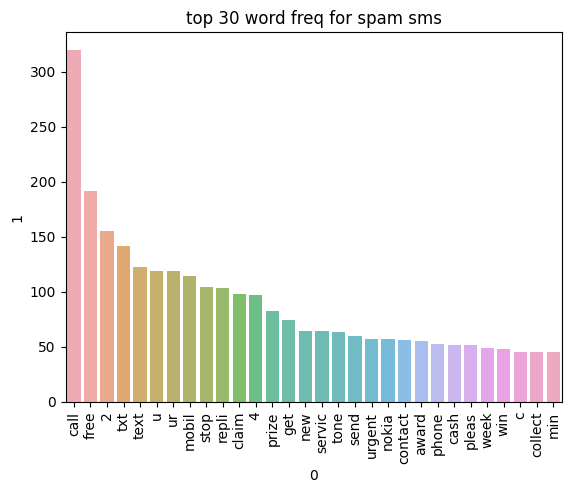

In [66]:
sns.barplot(x=pd.DataFrame(Counter(spam_words).most_common(30))[0],y=pd.DataFrame(Counter(spam_words).most_common(30))[1], alpha=0.8)
plt.xticks(rotation='vertical')
plt.title('top 30 word freq for spam sms')
plt.show()

# Model building

In [67]:
df.head()

target                                              texts  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [123]:
# we need to vectorize the transformed text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=2000)

In [124]:
x = cv.fit_transform(df['transformed_text']).toarray() # toarray() function is used to convert the sparse array to dense array
x2 = tf.fit_transform(df['transformed_text']).toarray()

In [125]:
x2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
y = df['target'].values

In [127]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x2,y, test_size=0.3, random_state=100)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.3, random_state=100)

In [129]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [130]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [131]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [132]:
gnb.fit(x_train, y_train)
pred1 = gnb.predict(x_valid)

In [133]:
print(accuracy_score(y_valid, pred1))
print(confusion_matrix(y_valid, pred1))
print(precision_score(y_valid, pred1))

0.832258064516129
[[785 165]
 [ 17 118]]
0.4169611307420495


In [134]:
mnb.fit(x_train, y_train)
pred2 = mnb.predict(x_valid)
print(accuracy_score(y_valid, pred2))
print(confusion_matrix(y_valid, pred2))
print(precision_score(y_valid, pred2))

0.9778801843317972
[[950   0]
 [ 24 111]]
1.0


In [135]:
bnb.fit(x_train, y_train)
pred3 = bnb.predict(x_valid)
print(accuracy_score(y_valid, pred3))
print(confusion_matrix(y_valid, pred3))
print(precision_score(y_valid, pred3))

0.9806451612903225
[[947   3]
 [ 18 117]]
0.975


# Binomial NB is performing well as the precision is high, and as the data is imbalanced so we care more about precision than accuracy score

# but the precision score for multinomial NB is 100% when we used TFIDF

In [136]:
import pickle
pickle.dump(tf, open('tfdif.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))